In [9]:
import pandas as pd


In [3]:
import requests

file_url = "https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt"
file_name = "ci034243xsi20040112_053635.txt"

# Send a GET request to download the file
response = requests.get(file_url)

# Save the file
with open(file_name, "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [6]:
import urllib.request

file_url = "https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv"
file_name = "delaney.csv"

# Download the file
urllib.request.urlretrieve(file_url, file_name)

print("File downloaded successfully!")

File downloaded successfully!


In [11]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


# 2.3. Examining the SMILES data
Chemical structures are encoded by a string of text known as SMILES which is an acronym for Simplified Molecular-Input Line-Entry System.

In [14]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

The first element from the SMILES column of the sol dataframe.

In [15]:
sol.SMILES[0]

'ClCC(Cl)(Cl)Cl'

# 2.4. Convert a molecule from the SMILES string to an rdkit object

In [17]:
!pip install rdkit
from rdkit import Chem


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\dip07\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/20.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/20.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/20.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/20.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/20.7 MB ? eta -:--:--
     --------------------------------------- 0.1/20.7 MB 812.7 kB/s eta 0:00:26
     --------------------------------------- 0.1/20.7 MB 657.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/20.7 MB 581.0 kB/s eta 0:00:36
     --------------------------------------- 0.1/20.7 MB 544.7 kB/s eta 0:00:38
     --------------------------------------- 0.1/20.7 MB 514.3 kB/s eta 0:00:40
     --------------------------------------- 0.1/20.7 MB 500.5 kB/s eta 0:00:42
     --------------------------------------- 0.1/20.7 MB 500.5 kB/s eta 0:00:42
     --------------------------------------- 0.1/20.7 MB 500.5 kB/s eta 0:00:42


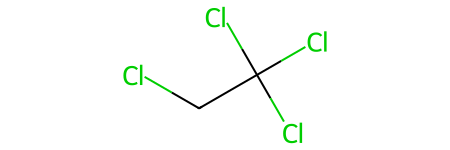

In [18]:
Chem.MolFromSmiles(sol.SMILES[0])

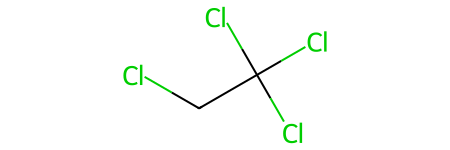

In [19]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

# 2.5. Working with rdkit object

In [21]:
m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

In [22]:
m.GetNumAtoms()

6

# 3. Calculate molecular descriptors in rdkit

# 3.1. Convert list of molecules to rdkit object

In [23]:
from rdkit import Chem

# 3.1.1. Method 1

In [24]:
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [25]:
len(mol_list)

1144

In [26]:
mol_list[:5]

# 3.1.2. Method 2

In [27]:
mol_list2 = [Chem.MolFromSmiles(element) for element in sol.SMILES]

In [28]:
len(mol_list2)

1144

In [29]:
mol_list2[:5]

# 3.2.1. LogP, MW and RB

In [30]:
import numpy as np
from rdkit.Chem import Descriptors

In [31]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [32]:
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


# 3.2.2. Aromatic proportion

# 3.2.1.1. Number of aromatic atoms
Here, we will create a custom function to calculate the Number of aromatic atoms. With this descriptor we can use it to subsequently calculate the AP descriptor.

Computing for a single molecule.

In [33]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

In [34]:
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [35]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [36]:
AromaticAtoms(m)

19

Computing for molecules in the entire dataset

In [37]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

# 3.2.1.2. Number of heavy atoms
Here, I will use an existing function for calculating the Number of heavy atoms.

Computing for a single molecule.

In [38]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
Descriptors.HeavyAtomCount(m)

34

Computing for molecules in the entire dataset

In [39]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

# 3.2.1.3. Computing the Aromatic Proportion (AP) descriptor
Computing for a single molecule.

In [40]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

Computing for molecules in the entire dataset.

In [41]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [42]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


# 3.3. X matrix (Combining all computed descriptors into 1 dataframe)


In [43]:
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [44]:
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


Let's combine the 2 dataframes to produce the X matrix

In [45]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# 3.4. Y matrix

In [46]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [49]:
Y = sol["measured log(solubility:mol/L)"]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

# Data split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Linear Regression Model

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Predicts the X_train

In [54]:
Y_pred_train = model.predict(X_train)

In [55]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.72659988 -0.00701435 -0.00162188 -0.46896762]
Intercept: 0.3232392875111021
Mean squared error (MSE): 1.04
Coefficient of determination (R^2): 0.77


# Predicts the X_test

In [57]:
Y_pred_test = model.predict(X_test)

In [58]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.72659988 -0.00701435 -0.00162188 -0.46896762]
Intercept: 0.3232392875111021
Mean squared error (MSE): 0.92
Coefficient of determination (R^2): 0.78


# Linear Regression Equation:
 The work of Delaney
 provided the following linear regression equation:

LogS = 0.16 - 0.63 cLogP - 0.0062 MW + 0.066 RB - 0.74 AP

 The reproduction by Pat Walters
 provided the following:

LogS = 0.26 - 0.74 LogP - 0.0066 MW + 0.0034 RB - 0.42 AP

This notebook's reproduction gave the following equation:

Based on the Train set
LogS = 0.30 -0.75 LogP - .0066 MW -0.0041 RB - 0.36 AP

Based on the Full dataset
LogS = 0.26 -0.74 LogP - 0.0066 + MW 0.0032 RB - 0.42 AP

# Our linear regression equation

In [61]:
"print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )"

"print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )"

The same equation can also be produced with the following code (which breaks up the previous one-line code into several comprehensible lines.

In [62]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [63]:
print('LogS = ' + ' ' + yintercept + ' ' + LogP + ' ' +  MW +  ' ' + RB + ' ' + AP)

LogS =  0.32 -0.73 LogP -0.0070 MW -0.0016 RB -0.47 AP


# Use entire dataset for model training (For Comparison)

In [64]:
full = linear_model.LinearRegression()
full.fit(X, Y)

LinearRegression()

In [65]:
full_pred = model.predict(X)

In [66]:
print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997181
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [67]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '+ %.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]

In [68]:
print('LogS = ' + ' ' + full_yintercept + ' ' + full_LogP + ' ' + full_MW + ' ' + full_RB + ' ' + full_AP)

LogS =  0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


# Scatter plot of experimental vs. predicted LogS

In [69]:
import matplotlib.pyplot as plt

# Quick check of the variable dimensions of Train and Test sets


In [70]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [71]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

# Vertical plot

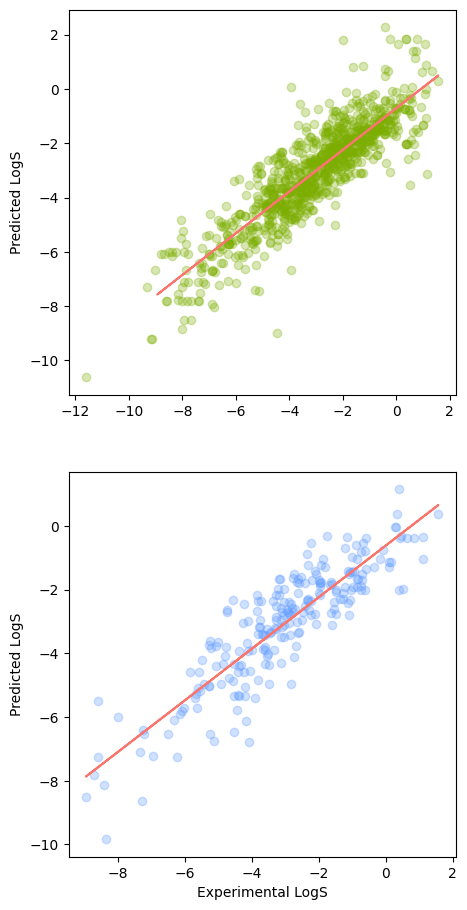

In [73]:
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()
     

# Horizontal plot

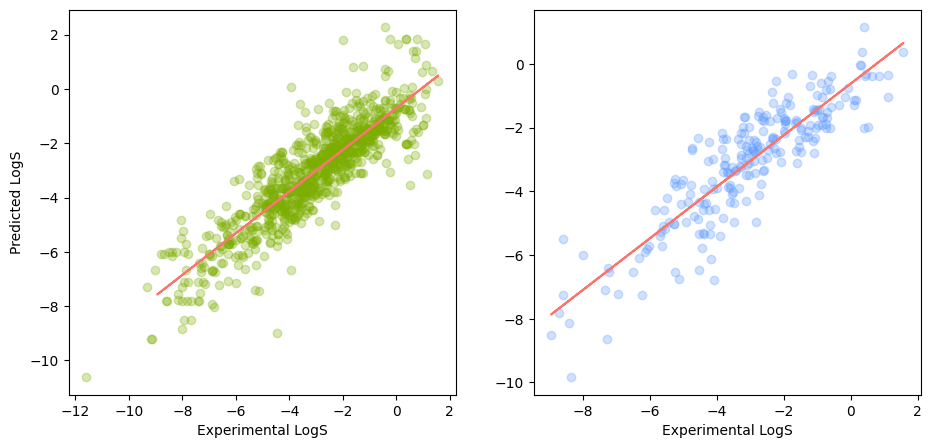

In [74]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()


In [78]:
import os

# List files and directories in the current directory
os.system('dir')
!dir

 Volume in drive C has no label.
 Volume Serial Number is B26A-5200

 Directory of C:\Users\dip07

05/10/2023  12:13 AM    <DIR>          .
03/26/2023  11:10 AM    <DIR>          ..
05/08/2023  04:14 AM               423 .bash_history
03/29/2023  12:20 PM    <DIR>          .cache
03/29/2023  09:43 AM           397,312 .chembl_ws_client__0.10.8
03/27/2023  09:31 AM           172,032 .chembl_ws_client__development
03/29/2023  11:56 AM               208 .gitconfig
05/09/2023  10:13 PM    <DIR>          .ipynb_checkpoints
03/27/2023  06:46 AM    <DIR>          .ipython
03/26/2023  01:00 PM    <DIR>          .jupyter
05/05/2023  08:54 PM    <DIR>          .matplotlib
05/05/2023  08:29 PM    <DIR>          .streamlit
05/05/2023  09:01 PM    <DIR>          .vscode
05/05/2023  09:01 PM    <DIR>          .vscode-cli
05/06/2023  08:31 AM             3,282 app.py
05/08/2023  12:34 AM            32,938 Building a Classification Model.ipynb
05/09/2023  02:21 AM            46,374 Calculate Customer 

# Reference
1.John S. Delaney. ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure. *J. Chem. Inf. Comput. Sci.* 2004, 44, 3, 1000-1005.

2.Pat Walters. Predicting Aqueous Solubility - It's Harder Than It Looks. *Practical Cheminformatics Blog*

3.Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. Deep Learning for the Life Sciences: Applying Deep      Learning to Genomics, Microscopy, Drug Discovery, and More, O'Reilly, 2019.

4.Supplementary file from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.